In [30]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])

<Axes: >

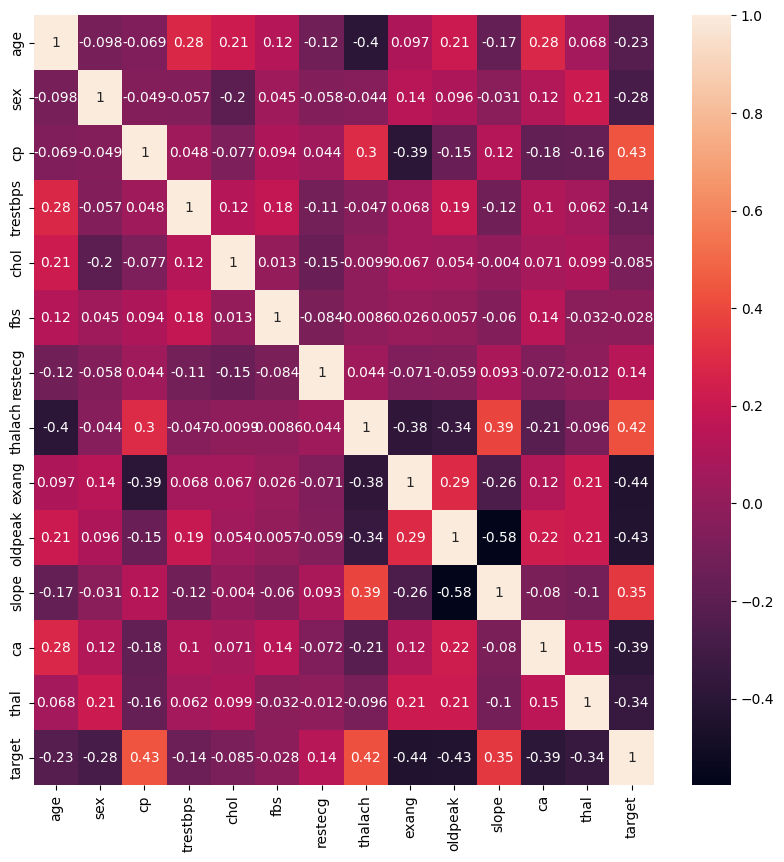

In [14]:
corr_features = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_features, annot=True)

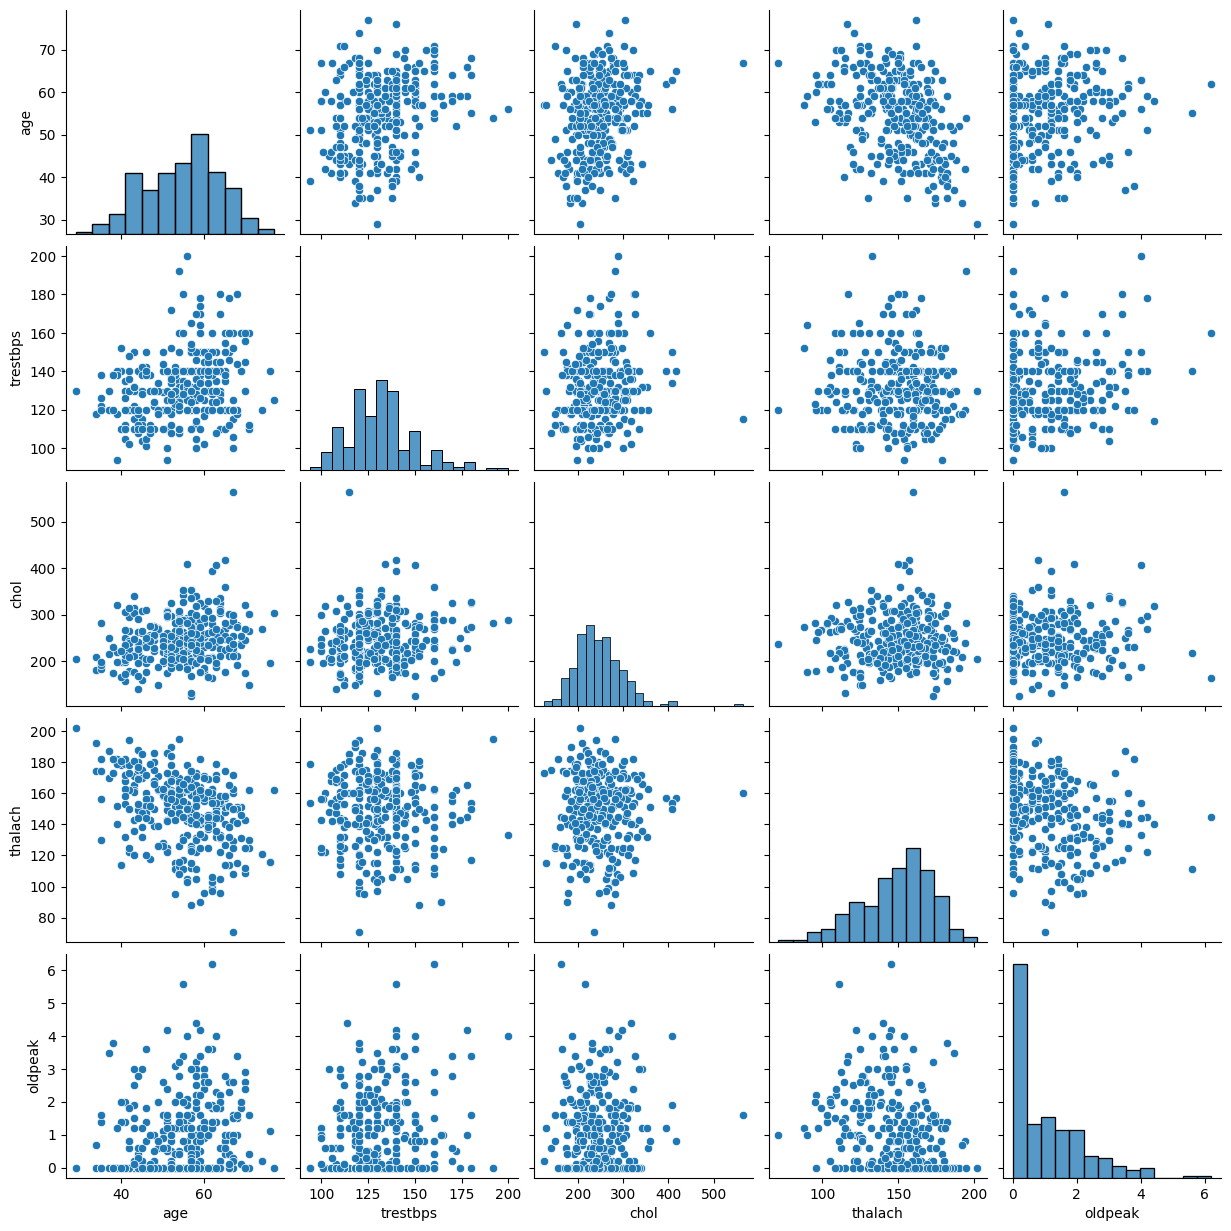

In [23]:
sns.pairplot(df, vars=numerical_features)

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
x = df.drop(columns='target')
y = df['target']

In [32]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
from keras.models import Sequential
from keras.layers import Dense # Dense e najednostaven feed forward sloj - sto znaci toa sto ke ima na vlez ke izleze samo so aktivaciska funkcija. 

In [65]:
model = Sequential()

#prv sloj e vlezniot sloj
model.add(Dense(32,input_dim=13, kernel_initializer='uniform', activation='relu'))  #input_dim = 13 broj vlezovi

#odime so hidden layers (mozeme kolku sakame da dodavame)
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))

#izlezen sloj
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #sigmoid funkcija koga imame binarna klasifikacija 0 ili 1
# 1 izlez imame (ILI 0 ILI 1 ), ako imavme target1, target2, poveke targeti vo 2 ke stavevme - multiclass 

#units - broj na nevroni sto ke go ima prviot sloj
#input_dimension - dolzinata na vlezot (x_train) - kolku features ima 

#ovie 32 nevroni ke gi primat site 13 vlezovi i ke dadat za sekoj nevron razlicen izlez

#kernel_initializer='uniform' - oznacuva deka site karakteristiki imaat ista verojatnost da se pojavat

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
len(x_train[0]) #prvata redica vo x_train - kolku imame na vlez elementi

13

In [47]:
y_train #kolku sto ima y - koloni (izlezni)

298    0
239    0
64     1
147    1
94     1
      ..
115    1
131    1
169    0
56     1
104    1
Name: target, Length: 242, dtype: int64

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model.fit(x_train, y_train,epochs=100,batch_size=32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4992 - loss: 0.6931
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5562 - loss: 0.6927
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5387 - loss: 0.6922
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5598 - loss: 0.6909
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.6889
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8083 - loss: 0.6834
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.6743 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.6574
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.6316 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.6000
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.5628 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.526

In [55]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [60]:
y_pred = y_pred.round()

In [62]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8666666666666667
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.87      0.87      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<Axes: >

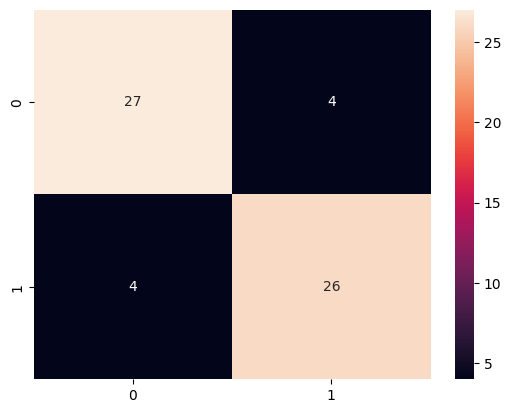

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [68]:
# NN VS XGBoost

from xgboost import XGBClassifier

model2 = XGBClassifier(max_depth = 50, n_estimators = 200, learning_rate = 0.1, n_jobs = -1, verbose=1)

model2.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:27:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred_xgb = model2.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred_xgb))

0.7540983606557377
